In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [203]:
import numpy as np
import matplotlib.pyplot as plt

In [204]:
## data used to train classifier
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1]).reshape(-1, 1)

In [205]:
# Initializing weights
W = np.random.rand(X_train.shape[1], 1) # shape (2, 1) we want (W1, W2) for 2 features
b = 0

In [206]:
def sigmoid(z):
    return  1 / (1 + np.exp(-z))

In [207]:
def process(X, W, b):
    z = np.dot(X, W) + b
    return sigmoid(z)

In [209]:
def get_loss(X, y, W, b):
    m = len(X)
    y_pred = process(X, W, b)
    
    epsilon = 1e-10
    y_pred += epsilon ## to avoid y_pred to be zero which lead to log(0)
    
    loss = y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)
    return -1*loss

In [210]:
def get_cost(X, y, W, b):
    return get_loss(X, y, W, b)

In [211]:
def get_gradients(X, y, W, b):
    m = len(X)
    y_pred = process(X, W, b)
    
    dW = np.dot(X.T, (y_pred - y)) / m
    db = np.sum(y_pred - y) / m

    return dW, db

Total cost at epoch 20: 0.6034492794016149


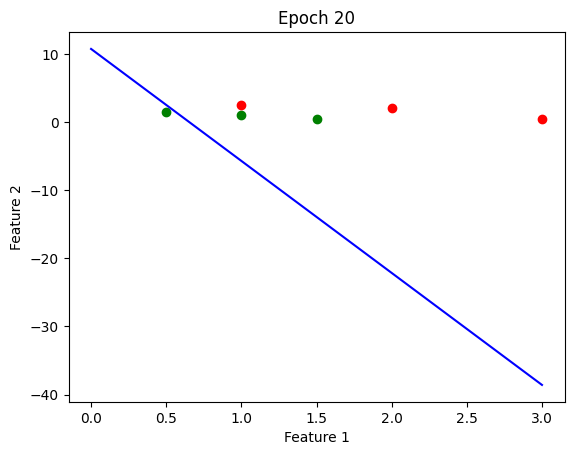

Total cost at epoch 40: 0.5748522248631349


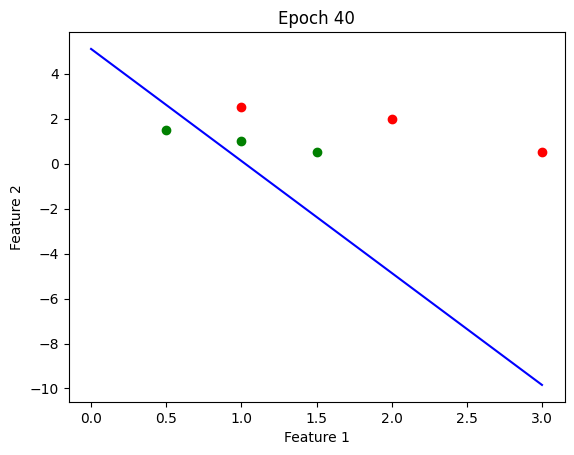

Total cost at epoch 60: 0.5499871214292766


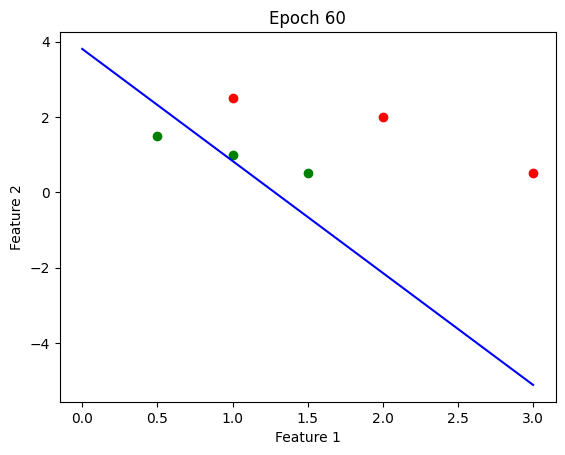

Total cost at epoch 80: 0.5269885864560855


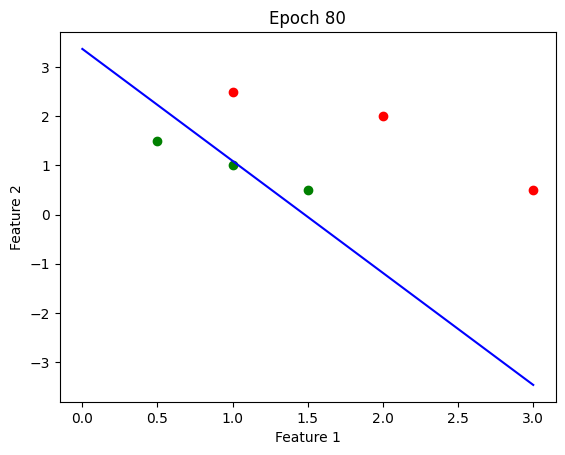

Total cost at epoch 100: 0.5055605858324015


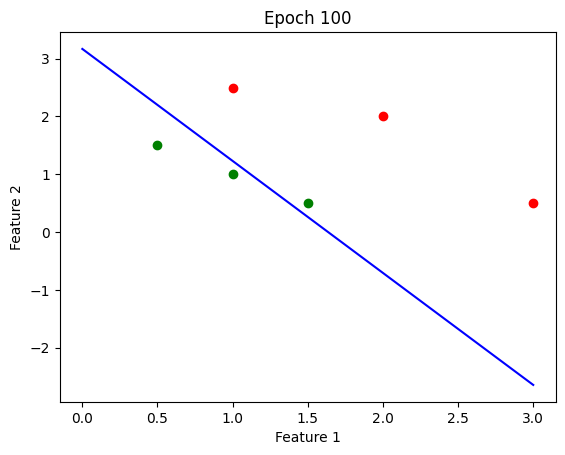

Total cost at epoch 120: 0.4855177298303164


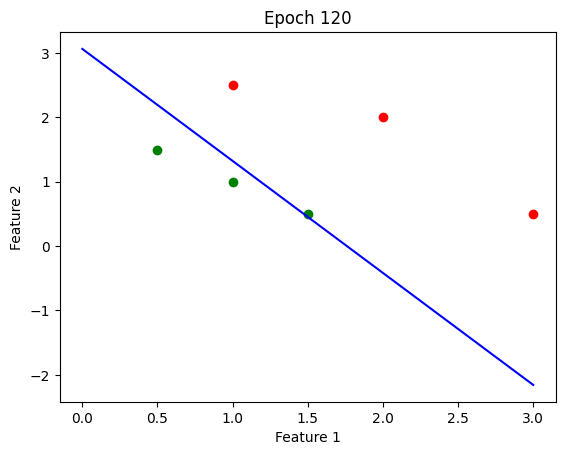

Total cost at epoch 140: 0.4667264728623181


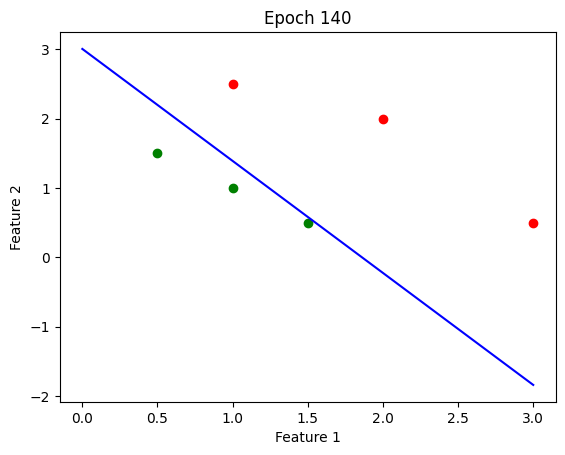

Total cost at epoch 160: 0.4490810542717843


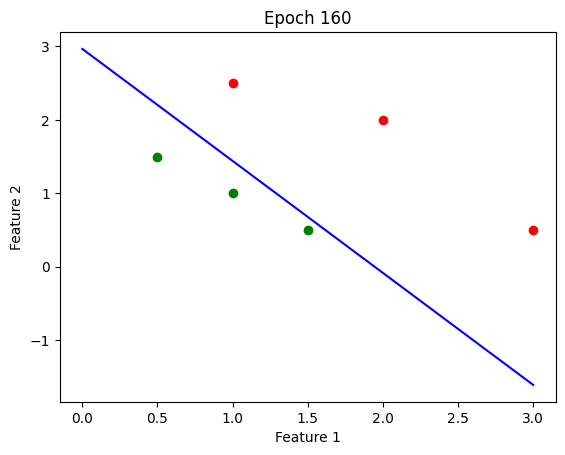

Total cost at epoch 180: 0.4324918804614509


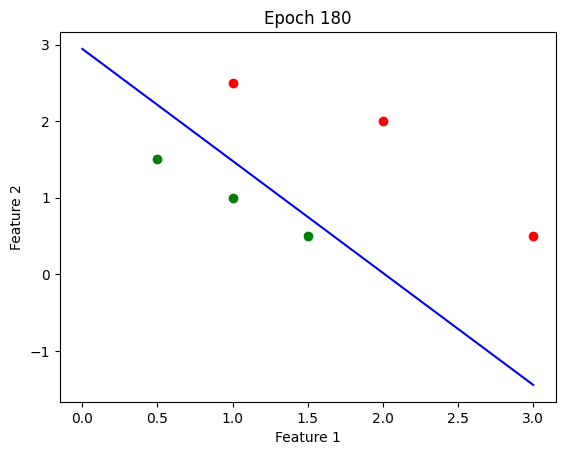

Total cost at epoch 200: 0.4168798696414237


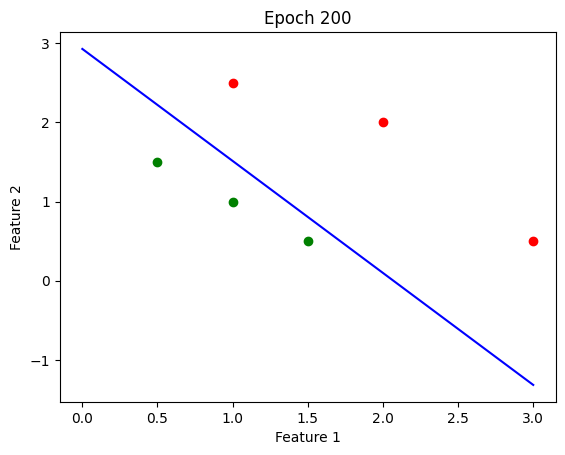

In [202]:
## gradient descent

epochs = 200
lr = 0.1

for epoch in range(epochs):
    cost = get_cost(X_train, y_train, W, b)
    dW, db = get_gradients(X_train, y_train, W, b)

    W -= lr * dW
    b -= lr * db

    ## plotting descision boundary
    if((epoch + 1) % 20 == 0):
        print(f"Total cost at epoch {epoch + 1}: {cost}")
        
        plt.figure()
        
        # Plot decision boundary
        x_values = np.linspace(0, 3, 100)
        y_values = -(W[0] * x_values + b) / W[1]
        plt.plot(x_values, y_values, color='blue')
        
        # Plot data points
        for i in range(len(X_train)):
            if y_train[i] == 1:
                plt.scatter(X_train[i][0], X_train[i][1], color='red')
            else:
                plt.scatter(X_train[i][0], X_train[i][1], color='green')
        
        plt.title(f"Epoch {epoch + 1}")
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()
